train loss:2.2998972453777236
=== epoch:1, train acc:0.231, test acc:0.236 ===
train loss:2.295721821361099
train loss:2.288797818059546
train loss:2.2841339059756702
train loss:2.27822485853553
train loss:2.2654685828974954
train loss:2.254407780657926
train loss:2.21511196094543
train loss:2.1833696380173278
train loss:2.168737485157131
train loss:2.131537804891339
train loss:2.1498446396043263
train loss:2.0676024018177785
train loss:2.00090114937646
train loss:1.9561788229597452
train loss:1.8821448089506156
train loss:1.8058231722747156
train loss:1.8361972511286495
train loss:1.6240014376661622
train loss:1.5942134177036036
train loss:1.482739976682936
train loss:1.3107105583848782
train loss:1.412410901215471
train loss:1.393048122557562
train loss:1.2309868660497612
train loss:1.035170638462059
train loss:1.0425710252773392
train loss:0.8970823858054569
train loss:0.8382165709730691
train loss:0.8678618106363973
train loss:0.8887877529012331
train loss:0.8307713063549584
train 

train loss:0.17911965133376356
train loss:0.16449666979399644
train loss:0.17754374900412143
train loss:0.15226978381163947
train loss:0.15777115004269948
train loss:0.3016738467541814
train loss:0.12276027830322692
train loss:0.1657865689700952
train loss:0.11852511716131929
train loss:0.1435273385484474
train loss:0.1720000905946132
train loss:0.1162212284689653
train loss:0.17980367391084667
train loss:0.1874433484931004
train loss:0.13710831938378618
train loss:0.20320226145708276
train loss:0.22656464317035646
train loss:0.11600708628225544
train loss:0.13312522555207063
train loss:0.11775014191137143
train loss:0.11302190815712593
train loss:0.2015829675568776
train loss:0.199389357295707
train loss:0.14051953284921084
train loss:0.19193645043148724
train loss:0.18315021193309156
train loss:0.13297242167011303
train loss:0.07140574099394126
train loss:0.15834215954034334
train loss:0.16538371490409318
train loss:0.1579172814567766
train loss:0.10891936823044583
train loss:0.09234

train loss:0.0922066591884469
train loss:0.08789019879094434
train loss:0.06764051123078806
train loss:0.08048817871241942
train loss:0.08360758809501495
train loss:0.060974782995182865
train loss:0.18063967817236562
train loss:0.12091837963385499
train loss:0.06982424192182805
train loss:0.06931443688554544
train loss:0.04866865617027354
train loss:0.08672213577154159
train loss:0.18713296700642856
train loss:0.12985945465072468
train loss:0.05688453948632032
train loss:0.11003848266392822
train loss:0.10186432280767392
train loss:0.16675982910918655
train loss:0.03754229290742021
train loss:0.1416082929752038
train loss:0.1636464995277929
train loss:0.05221457067204132
train loss:0.054443020922480254
train loss:0.04295349970431851
train loss:0.08968580408668289
train loss:0.13193238613297276
train loss:0.11219675948890058
train loss:0.05433765374738495
train loss:0.059073822233533635
train loss:0.07006949567422761
train loss:0.06812992480584987
train loss:0.08373005355572072
=== epoc

train loss:0.04467061842495511
train loss:0.07097492398373664
train loss:0.05230099932298961
train loss:0.014834095259596674
train loss:0.026517188792140246
train loss:0.016301072504478008
train loss:0.025055219816674676
train loss:0.04206502322818272
train loss:0.031558584115593334
train loss:0.04941747691692266
train loss:0.022616085276146832
train loss:0.05840165953152053
train loss:0.014582359958420723
train loss:0.04235786884699186
train loss:0.09008515383684135
train loss:0.04189459109570266
train loss:0.051675632479397965
train loss:0.06152933225505046
train loss:0.0181250177535062
train loss:0.07707658272410228
train loss:0.0776160015125807
train loss:0.04023666029237476
train loss:0.06222192337101588
train loss:0.04378130253913311
train loss:0.07542792125682453
train loss:0.048419539569731614
=== epoch:17, train acc:0.986, test acc:0.955 ===
train loss:0.015486227346885047
train loss:0.03471530888672902
train loss:0.027569747218207232
train loss:0.0230129145003793
train loss:0

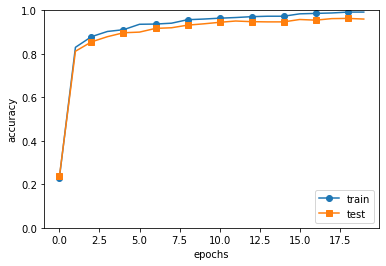

In [5]:
import sys 
import os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist
from common.trainer import Trainer


class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5,
                             'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                               (conv_output_size/2))

        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()